In [1]:
import numpy as np
from skimage import io, color, img_as_float
from IPython.display import display, Image
import cv2

In [2]:
# Function to normalize an image
def normalize_image(im):
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res

# Function to normalize columns
def norm_columns(f, x):
    return f(x) / np.sum(f(x), axis=0)

# Function to normalize rows
def norm_rows(f, x):
    return f(x) / np.sum(f(x), axis=1)[:, np.newaxis]

# See https://chat.openai.com/share/d01e5b68-f1f5-403a-9976-1203ad4cd65c for further explanation

In [3]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")
mandrill_float = img_as_float(mandrill)

In [4]:
# because of the simplicity of our implementation, the input image must already be float
def julia_monochrome(rgb_image):
    # coeffs = np.array([0.2125, 0.7154, 0.0721], dtype=rgb.dtype) - this is Python standard
    coeffs = np.array([0.299, 0.587, 0.114], dtype=rgb_image.dtype)
    return rgb_image @ coeffs

In [5]:
# because of the simplicity of our implementation, the input image must already be float
m = julia_monochrome(mandrill_float)

In [6]:
def save_show(monochrome_image, file_name):
    monochrome_image_uint8 = (monochrome_image * 255).astype(np.uint8)
    cv2.imwrite(file_name, monochrome_image_uint8)
    display(Image(filename=file_name))

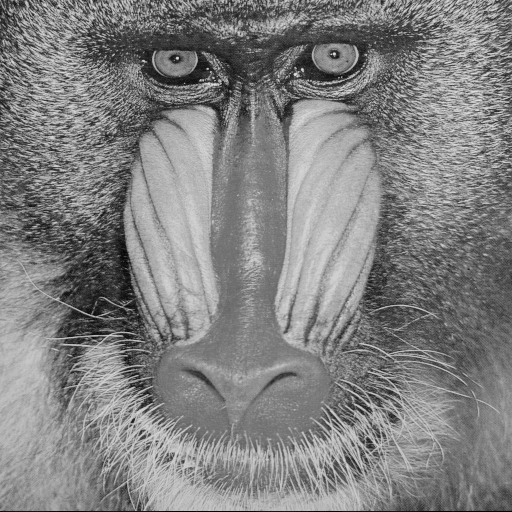

In [7]:
save_show(m, 'gray_mandrill.png')

In [8]:
t_m_m = normalize_image(np.dot(np.transpose(m), m))

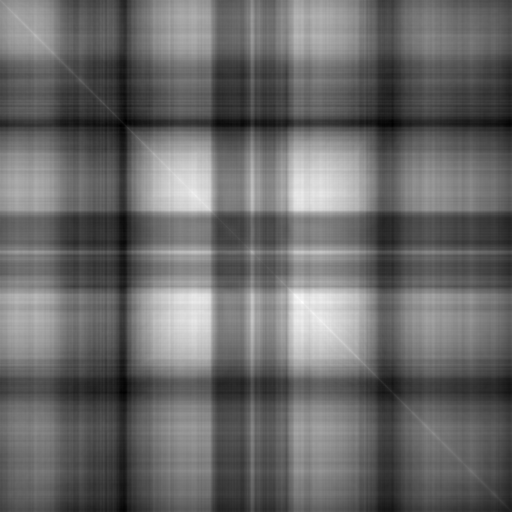

In [9]:
save_show(t_m_m, 'product_t_m_m.png')

In [10]:
# import cv2

# Load an image from file
# img = cv2.imread('path/to/image.png')
# Resize the image
# new_img = cv2.resize(img, (new_width, new_height))
# Save the image
# cv2.imwrite('path/to/save/resized_image.png', new_img)

m_new = cv2.resize(m, (512, 256))

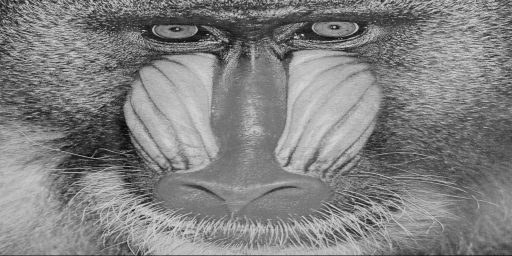

In [11]:
save_show(m_new, 'm_new.png')

In [12]:
m_other = cv2.resize(m, (256, 512))

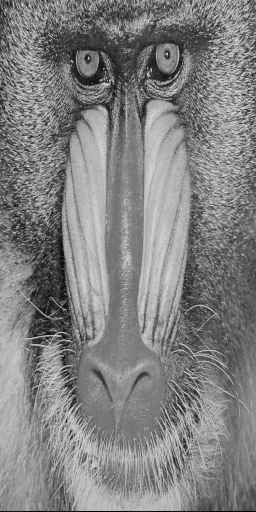

In [13]:
save_show(m_other, 'm_other.png')

In [16]:
m_new_t = np.transpose(m_new)

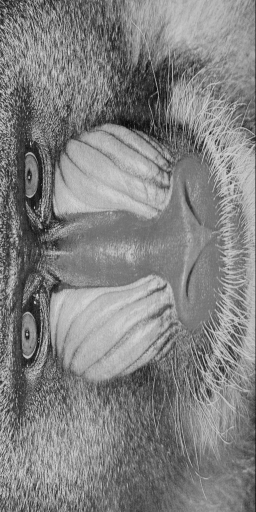

In [17]:
save_show(m_new_t, 'm_new_t.png')

In [18]:
product_1 = normalize_image(np.dot(m_new_t, m_new))

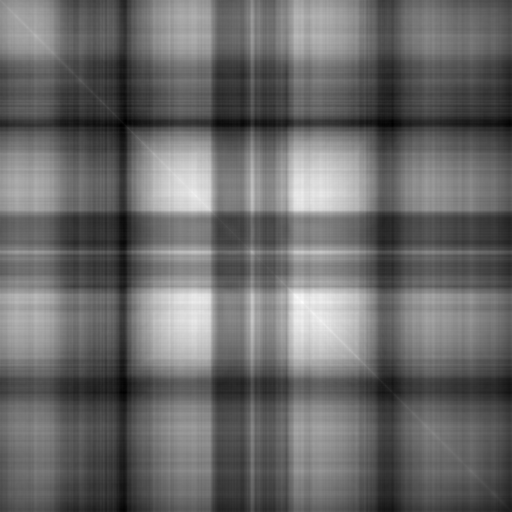

In [19]:
save_show(product_1, 'product_1.png')

In [20]:
product_2 = normalize_image(np.dot(m_new, m_new))

ValueError: shapes (256,512) and (256,512) not aligned: 512 (dim 1) != 256 (dim 0)